# Facial Recognition of Olivetti Dataset using Optimized CNN Model

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, models
import torch.nn.functional as F
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
data = fetch_olivetti_faces(shuffle=False, random_state=0)

We used sklearn to load the Olivetti faces data-set from AT&T. In this dataset there are 400 images, 40 classes, and ten images per class. A class represents a person. The photos were taken infront of a dark homogenous background. The lighting and facial expressions may vary per person and picture. The resulting images are in grey scale and cropped to 64x64 for easier usage. The dataset has been prepared into four categories, data, images, target, and description. The data (400, 4096) represents a ravelled face image of original size 64 x 64 pixels in each row, reshaped into a vector that can be easily utilized for the CNN model. Each row in images is a face image corresponding to one of the 40 subjects. The target is the true id or label associated with each image, ranging between 0 and 39. We can take a look at all of these below:

In [4]:
data.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [5]:
data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [6]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

/var/folders/03/yxx4_7ls3fdb9cz11kjg_gvc0000gn/T/ipykernel_12449/2668156014.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


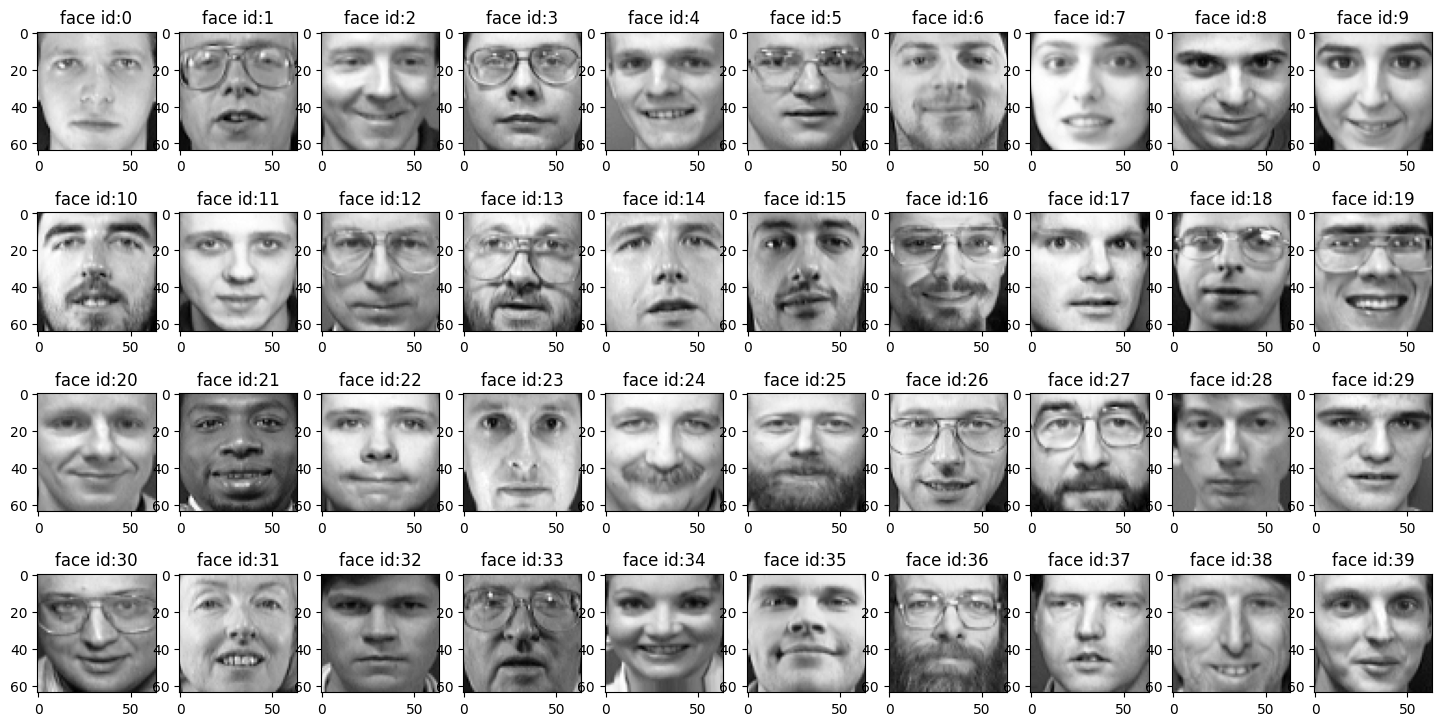

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))

people = list(range(0, len(data.target), 10))

count = 0
for h in range(4):
    for k in range(10):
        ax[h, k].imshow(data.images[people[count]], cmap='gray')
        ax[h, k].set_title("face id:{}".format(count))
        count += 1
fig.show()

We may also be interested in looking at the variation of the 10 images taken for each person. We can do this by looking at all of the photos taken for the first 5 subjects.

In [8]:
fig2, ax = plt.subplots(nrows=5, ncols=10, figsize=(25, 15))

people = list(range(0, 50))

count = 0
idnum = -1
for h in range(5):
    idnum += 1
    for k in range(10):
        ax[h, k].imshow(data.images[people[count]], cmap='gray')
        ax[h, k].set_title("face id:{}".format(idnum))
        count += 1
fig2.show()

/var/folders/03/yxx4_7ls3fdb9cz11kjg_gvc0000gn/T/ipykernel_12449/1343486997.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


As we can see that there is some variation in the facial expressions, lighting, positioning, and accessories observed for each person. The subject with face id 3, for example, is wearing glasses in only half of the pictures. These glasses appear to be same or similar to the glasses worn by face id 1, which may impact the accuracy of our model. Our CNN model would need to learn to differentiate the two subjects based on their facial features and not just the layout of the picture.

In [9]:
data = fetch_olivetti_faces(shuffle=True, random_state=0)
images = data.images.reshape((-1, 1, 64, 64)).astype(np.float32)  # Reshape to [N, C, H, W]
targets = data.target

# Split the dataset into training and testing
train_images, test_images = images[:300], images[300:]
train_targets, test_targets = targets[:300], targets[300:]

# Convert numpy arrays to PyTorch tensors
train_images_tensor = torch.tensor(train_images)
train_targets_tensor = torch.tensor(train_targets)
test_images_tensor = torch.tensor(test_images)
test_targets_tensor = torch.tensor(test_targets)

# Create DataLoader
train_dataset = TensorDataset(train_images_tensor, train_targets_tensor)
test_dataset = TensorDataset(test_images_tensor, test_targets_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Model1 is ReLU and Adam optimizer.

In [10]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, activation_fn=nn.ReLU, drop_rate=0.0):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.activation_fn = activation_fn(inplace=True)
        self.dropout = nn.Dropout(p=drop_rate)  # Dropout layer
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.dropout(out)  # Apply dropout
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.activation_fn(out)
        return out

    
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=40, activation_fn=nn.ReLU):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # Initial convolution
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.activation_fn = activation_fn(inplace=True)
        
        # ResNet layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, activation_fn=activation_fn,drop_rate=0.1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, activation_fn=activation_fn,drop_rate=0.1)

        self._to_linear = None
        self._get_conv_output_size(torch.rand(1, 1, 64, 64))

        self.linear = nn.Linear(self._to_linear, num_classes)
    
    def _make_layer(self, block, planes, num_blocks, stride, activation_fn, drop_rate=0.0):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, activation_fn=activation_fn, drop_rate=drop_rate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)


    def _get_conv_output_size(self, shape):
        with torch.no_grad():
            self.eval()
            output = self._forward_conv_only(shape)
            self._to_linear = np.prod(output.size()[1:])
            self.train()

    def _forward_conv_only(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        return out

    def forward(self, x):
        out = self._forward_conv_only(x)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


In [11]:
# Instantiate the model
num_blocks = [2, 2, 2, 2]  # ResNet18-like architecture
model1 = ResNet(BasicBlock, num_blocks, num_classes=40)

Epoch 1/40, Loss: 4.0429, Train Accuracy: 7.67%
Test Accuracy: 1.00%

Epoch 2/40, Loss: 2.9391, Train Accuracy: 25.67%
Test Accuracy: 6.00%

Epoch 3/40, Loss: 1.8967, Train Accuracy: 49.67%
Test Accuracy: 4.00%

Epoch 4/40, Loss: 1.2263, Train Accuracy: 64.67%
Test Accuracy: 1.00%

Epoch 5/40, Loss: 0.8326, Train Accuracy: 76.67%
Test Accuracy: 1.00%

Epoch 6/40, Loss: 0.4859, Train Accuracy: 89.67%
Test Accuracy: 1.00%

Epoch 7/40, Loss: 0.3490, Train Accuracy: 93.00%
Test Accuracy: 9.00%

Epoch 8/40, Loss: 0.2403, Train Accuracy: 95.33%
Test Accuracy: 2.00%

Epoch 9/40, Loss: 0.1198, Train Accuracy: 98.33%
Test Accuracy: 11.00%

Epoch 10/40, Loss: 0.0742, Train Accuracy: 99.33%
Test Accuracy: 16.00%

Epoch 11/40, Loss: 0.0493, Train Accuracy: 99.67%
Test Accuracy: 31.00%

Epoch 12/40, Loss: 0.0406, Train Accuracy: 100.00%
Test Accuracy: 64.00%

Epoch 13/40, Loss: 0.0368, Train Accuracy: 99.00%
Test Accuracy: 71.00%

Epoch 14/40, Loss: 0.0298, Train Accuracy: 99.33%
Test Accuracy: 63.

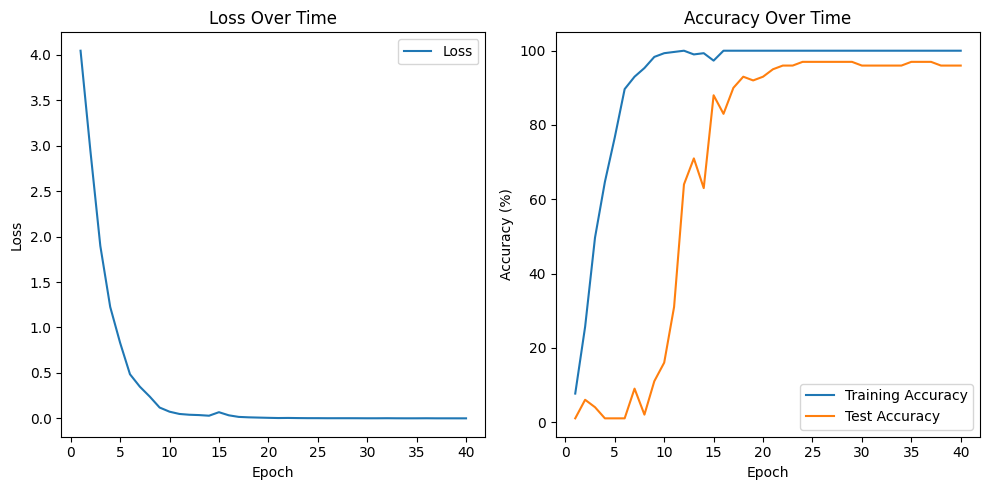

Final training accuracy for Model 1 (ReLU and Adam):  100.0
Final testing accuracy for Model 1 (ReLU and Adam):  96.0
Final loss for Model 1 (ReLU and Adam):  0.0010013706400059164


In [12]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    losses = []
    train_accuracies = []
    test_accuracies = []
        
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        losses.append(running_loss/len(train_loader))
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, '
              f'Train Accuracy: {train_accuracy:.2f}%')
        
        # Evaluation phase
        model.eval()  # Set model to evaluation mode
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
        
        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)
        print(f'Test Accuracy: {test_accuracy:.2f}%\n')
        
    # Plotting the loss function and test accuracy over time
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Time')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Save final loss, test accuracy, and train accuracy into variables for later use
    final_loss = losses[-1]
    final_test_accuracy = test_accuracies[-1]
    final_train_accuracy = train_accuracies[-1]
        
    return final_train_accuracy, final_test_accuracy, final_loss


# Now you can call the training function with the necessary parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
final_train_accuracy_model1, final_test_accuracy_model1, final_losses_model1 = train_model(model1, train_loader, test_loader, criterion, optimizer, num_epochs=40)
print("Final training accuracy for Model 1 (ReLU and Adam): ", final_train_accuracy_model1)
print("Final testing accuracy for Model 1 (ReLU and Adam): ", final_test_accuracy_model1)
print("Final loss for Model 1 (ReLU and Adam): ", final_losses_model1)

In [13]:
model1.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_fn): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation_fn): ReLU(inplace=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation_fn): ReLU

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
correct = 0
total = 0
with torch.no_grad():  # Disable gradient tracking
    for images, labels in test_loader:  # Assuming test_loader is your test dataset DataLoader
        images, labels = images.to(device), labels.to(device)  # Move to the correct device
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 96.00%


Model 2 is Leaky ReLU with Adam.

In [15]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, activation_fn=nn.LeakyReLU, drop_rate=0.0):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.activation_fn = activation_fn(inplace=True)
        self.dropout = nn.Dropout(p=drop_rate)  # Dropout layer
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.dropout(out)  # Apply dropout
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.activation_fn(out)
        return out

    
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=40, activation_fn=nn.LeakyReLU):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # Initial convolution
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.activation_fn = activation_fn(inplace=True)
        
        # ResNet layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, activation_fn=activation_fn,drop_rate=0.1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, activation_fn=activation_fn,drop_rate=0.1)

        self._to_linear = None
        self._get_conv_output_size(torch.rand(1, 1, 64, 64))

        self.linear = nn.Linear(self._to_linear, num_classes)
    
    def _make_layer(self, block, planes, num_blocks, stride, activation_fn, drop_rate=0.0):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, activation_fn=activation_fn, drop_rate=drop_rate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)


    def _get_conv_output_size(self, shape):
        with torch.no_grad():
            self.eval()
            output = self._forward_conv_only(shape)
            self._to_linear = np.prod(output.size()[1:])
            self.train()

    def _forward_conv_only(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        return out

    def forward(self, x):
        out = self._forward_conv_only(x)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [16]:
# Instantiate the model
num_blocks = [2, 2, 2, 2]  # ResNet18-like architecture
model2 = ResNet(BasicBlock, num_blocks, num_classes=40)

Epoch 1/40, Loss: 4.0584, Train Accuracy: 9.67%
Test Accuracy: 0.00%

Epoch 2/40, Loss: 3.1892, Train Accuracy: 18.67%
Test Accuracy: 0.00%

Epoch 3/40, Loss: 2.0544, Train Accuracy: 46.33%
Test Accuracy: 1.00%

Epoch 4/40, Loss: 1.3840, Train Accuracy: 65.00%
Test Accuracy: 1.00%

Epoch 5/40, Loss: 0.8778, Train Accuracy: 80.33%
Test Accuracy: 1.00%

Epoch 6/40, Loss: 0.6131, Train Accuracy: 84.33%
Test Accuracy: 1.00%

Epoch 7/40, Loss: 0.4041, Train Accuracy: 90.67%
Test Accuracy: 1.00%

Epoch 8/40, Loss: 0.2231, Train Accuracy: 96.67%
Test Accuracy: 7.00%

Epoch 9/40, Loss: 0.1821, Train Accuracy: 96.00%
Test Accuracy: 8.00%

Epoch 10/40, Loss: 0.0935, Train Accuracy: 99.00%
Test Accuracy: 12.00%

Epoch 11/40, Loss: 0.0774, Train Accuracy: 99.67%
Test Accuracy: 23.00%

Epoch 12/40, Loss: 0.0603, Train Accuracy: 99.00%
Test Accuracy: 37.00%

Epoch 13/40, Loss: 0.0444, Train Accuracy: 99.67%
Test Accuracy: 45.00%

Epoch 14/40, Loss: 0.0408, Train Accuracy: 99.00%
Test Accuracy: 79.00

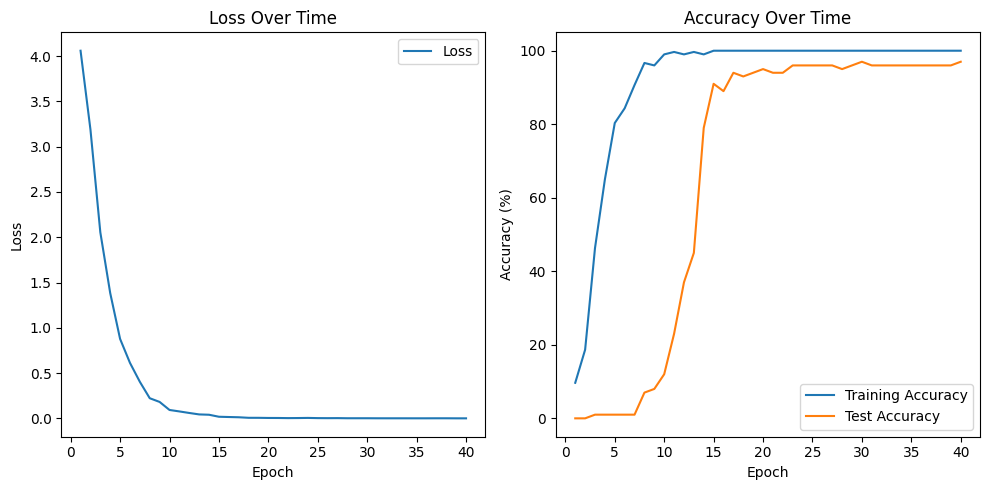

Final training accuracy for Model 1 (ReLU and Adam):  100.0
Final testing accuracy for Model 1 (ReLU and Adam):  97.0
Final loss for Model 1 (ReLU and Adam):  0.0010948842158541084


In [17]:
# Now you can call the training function with the necessary parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)
final_train_accuracy_model2, final_test_accuracy_model2, final_losses_model2 = train_model(model2, train_loader, test_loader, criterion, optimizer, num_epochs=40)
print("Final training accuracy for Model 2 (LeakyReLU and Adam): ", final_train_accuracy_model2)
print("Final testing accuracy for Model 2 (LeakyReLU and Adam): ", final_test_accuracy_model2)
print("Final loss for Model 2 (LeakyReLU and Adam): ", final_losses_model2)

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
correct = 0
total = 0
with torch.no_grad():  # Disable gradient tracking
    for images, labels in test_loader:  # Assuming test_loader is your test dataset DataLoader
        images, labels = images.to(device), labels.to(device)  # Move to the correct device
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 97.00%


Model 3 is Tanh and Adam

In [23]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, activation_fn=nn.Tanh, drop_rate=0.0):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.activation_fn = activation_fn()
        self.dropout = nn.Dropout(p=drop_rate)  # Dropout layer
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.dropout(out)  # Apply dropout
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.activation_fn(out)
        return out

    
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=40, activation_fn=nn.Tanh):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # Initial convolution
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.activation_fn = activation_fn()
        
        # ResNet layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, activation_fn=activation_fn,drop_rate=0.1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, activation_fn=activation_fn,drop_rate=0.1)

        self._to_linear = None
        self._get_conv_output_size(torch.rand(1, 1, 64, 64))

        self.linear = nn.Linear(self._to_linear, num_classes)
    
    def _make_layer(self, block, planes, num_blocks, stride, activation_fn, drop_rate=0.0):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, activation_fn=activation_fn, drop_rate=drop_rate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)


    def _get_conv_output_size(self, shape):
        with torch.no_grad():
            self.eval()
            output = self._forward_conv_only(shape)
            self._to_linear = np.prod(output.size()[1:])
            self.train()

    def _forward_conv_only(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        return out

    def forward(self, x):
        out = self._forward_conv_only(x)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [24]:
# Instantiate the model
num_blocks = [2, 2, 2, 2]  # ResNet18-like architecture
model3 = ResNet(BasicBlock, num_blocks, num_classes=40)

Epoch 1/40, Loss: 3.3688, Train Accuracy: 9.00%
Test Accuracy: 2.00%

Epoch 2/40, Loss: 2.5918, Train Accuracy: 32.00%
Test Accuracy: 3.00%

Epoch 3/40, Loss: 1.9577, Train Accuracy: 46.67%
Test Accuracy: 12.00%

Epoch 4/40, Loss: 1.4832, Train Accuracy: 63.00%
Test Accuracy: 23.00%

Epoch 5/40, Loss: 1.0857, Train Accuracy: 76.00%
Test Accuracy: 51.00%

Epoch 6/40, Loss: 0.9014, Train Accuracy: 80.67%
Test Accuracy: 49.00%

Epoch 7/40, Loss: 0.6564, Train Accuracy: 86.00%
Test Accuracy: 58.00%

Epoch 8/40, Loss: 0.4994, Train Accuracy: 90.67%
Test Accuracy: 58.00%

Epoch 9/40, Loss: 0.4393, Train Accuracy: 92.67%
Test Accuracy: 55.00%

Epoch 10/40, Loss: 0.3349, Train Accuracy: 94.33%
Test Accuracy: 58.00%

Epoch 11/40, Loss: 0.2112, Train Accuracy: 97.33%
Test Accuracy: 60.00%

Epoch 12/40, Loss: 0.1677, Train Accuracy: 99.33%
Test Accuracy: 65.00%

Epoch 13/40, Loss: 0.1233, Train Accuracy: 99.33%
Test Accuracy: 73.00%

Epoch 14/40, Loss: 0.0894, Train Accuracy: 100.00%
Test Accurac

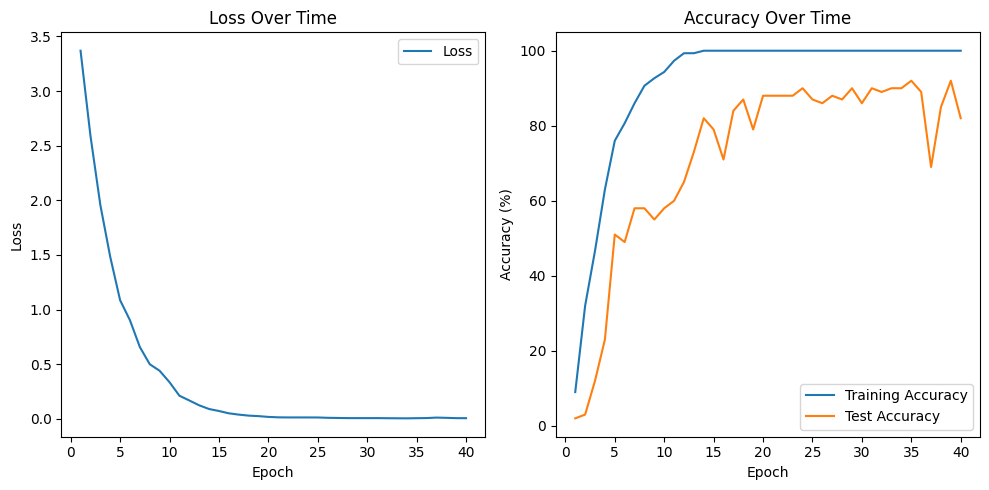

Final training accuracy for Model 3 (Tanh and Adam):  100.0
Final testing accuracy for Model 3 (Tanh and Adam):  82.0
Final loss for Model 3 (Tanh and Adam):  0.005365758668631315


In [25]:
# Now you can call the training function with the necessary parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)
final_train_accuracy_model3, final_test_accuracy_model3, final_losses_model3 = train_model(model3, train_loader, test_loader, criterion, optimizer, num_epochs=40)
print("Final training accuracy for Model 3 (Tanh and Adam): ", final_train_accuracy_model3)
print("Final testing accuracy for Model 3 (Tanh and Adam): ", final_test_accuracy_model3)
print("Final loss for Model 3 (Tanh and Adam): ", final_losses_model3)

Model 4 is ReLU with Stochastic Gradient Descent

In [26]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, activation_fn=nn.ReLU, drop_rate=0.0):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.activation_fn = activation_fn(inplace=True)
        self.dropout = nn.Dropout(p=drop_rate)  # Dropout layer
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.dropout(out)  # Apply dropout
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.activation_fn(out)
        return out

    
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=40, activation_fn=nn.ReLU):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # Initial convolution
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.activation_fn = activation_fn(inplace=True)
        
        # ResNet layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, activation_fn=activation_fn,drop_rate=0.1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, activation_fn=activation_fn,drop_rate=0.1)

        self._to_linear = None
        self._get_conv_output_size(torch.rand(1, 1, 64, 64))

        self.linear = nn.Linear(self._to_linear, num_classes)
    
    def _make_layer(self, block, planes, num_blocks, stride, activation_fn, drop_rate=0.0):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, activation_fn=activation_fn, drop_rate=drop_rate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)


    def _get_conv_output_size(self, shape):
        with torch.no_grad():
            self.eval()
            output = self._forward_conv_only(shape)
            self._to_linear = np.prod(output.size()[1:])
            self.train()

    def _forward_conv_only(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        return out

    def forward(self, x):
        out = self._forward_conv_only(x)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [27]:
# Instantiate the model
num_blocks = [2, 2, 2, 2]  # ResNet18-like architecture
model4 = ResNet(BasicBlock, num_blocks, num_classes=40)

Epoch 1/40, Loss: 3.7963, Train Accuracy: 2.00%
Test Accuracy: 1.00%

Epoch 2/40, Loss: 3.7388, Train Accuracy: 3.33%
Test Accuracy: 1.00%

Epoch 3/40, Loss: 3.6834, Train Accuracy: 3.67%
Test Accuracy: 1.00%

Epoch 4/40, Loss: 3.6360, Train Accuracy: 5.00%
Test Accuracy: 2.00%

Epoch 5/40, Loss: 3.6047, Train Accuracy: 5.33%
Test Accuracy: 1.00%

Epoch 6/40, Loss: 3.5730, Train Accuracy: 7.00%
Test Accuracy: 1.00%

Epoch 7/40, Loss: 3.5216, Train Accuracy: 9.33%
Test Accuracy: 0.00%

Epoch 8/40, Loss: 3.4924, Train Accuracy: 11.33%
Test Accuracy: 0.00%

Epoch 9/40, Loss: 3.4435, Train Accuracy: 10.00%
Test Accuracy: 0.00%

Epoch 10/40, Loss: 3.4174, Train Accuracy: 18.00%
Test Accuracy: 2.00%

Epoch 11/40, Loss: 3.3627, Train Accuracy: 15.67%
Test Accuracy: 1.00%

Epoch 12/40, Loss: 3.3505, Train Accuracy: 17.00%
Test Accuracy: 2.00%

Epoch 13/40, Loss: 3.3113, Train Accuracy: 19.67%
Test Accuracy: 5.00%

Epoch 14/40, Loss: 3.2621, Train Accuracy: 19.33%
Test Accuracy: 5.00%

Epoch 15

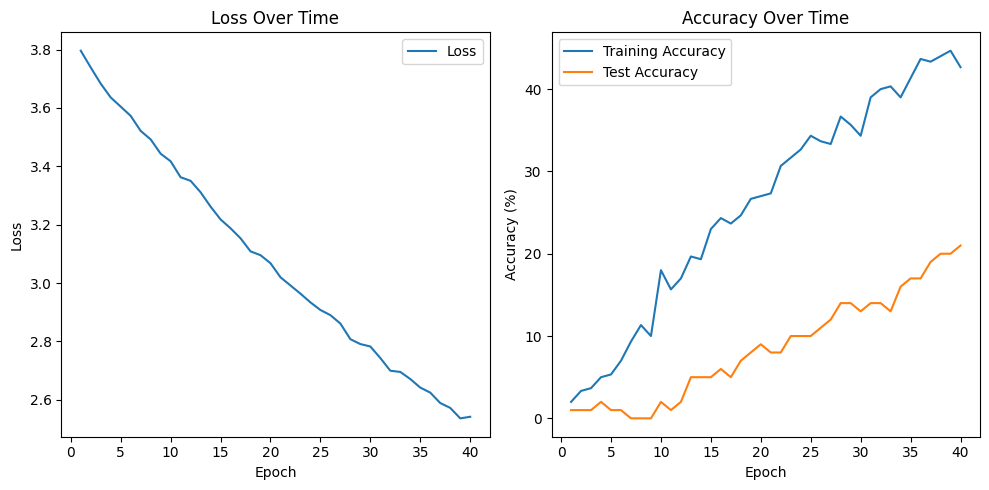

Final training accuracy for Model 4 (ReLU and Stochastic Gradient Descent):  42.666666666666664
Final testing accuracy for Model 4 (ReLU and Stochastic Gradient Descent):  21.0
Final loss for Model 4 (ReLU and Stochastic Gradient Descent):  2.54208083152771


In [28]:
# Now you can call the training function with the necessary parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=0.001)
final_train_accuracy_model4, final_test_accuracy_model4, final_losses_model4 = train_model(model4, train_loader, test_loader, criterion, optimizer, num_epochs=40)
print("Final training accuracy for Model 4 (ReLU and Stochastic Gradient Descent): ", final_train_accuracy_model4)
print("Final testing accuracy for Model 4 (ReLU and Stochastic Gradient Descent): ", final_test_accuracy_model4)
print("Final loss for Model 4 (ReLU and Stochastic Gradient Descent): ", final_losses_model4)

Model 5 is Leaky ReLU with SGD

In [29]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, activation_fn=nn.LeakyReLU, drop_rate=0.0):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.activation_fn = activation_fn(inplace=True)
        self.dropout = nn.Dropout(p=drop_rate)  # Dropout layer
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.dropout(out)  # Apply dropout
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.activation_fn(out)
        return out

    
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=40, activation_fn=nn.LeakyReLU):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # Initial convolution
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.activation_fn = activation_fn(inplace=True)
        
        # ResNet layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, activation_fn=activation_fn,drop_rate=0.1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, activation_fn=activation_fn,drop_rate=0.1)

        self._to_linear = None
        self._get_conv_output_size(torch.rand(1, 1, 64, 64))

        self.linear = nn.Linear(self._to_linear, num_classes)
    
    def _make_layer(self, block, planes, num_blocks, stride, activation_fn, drop_rate=0.0):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, activation_fn=activation_fn, drop_rate=drop_rate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)


    def _get_conv_output_size(self, shape):
        with torch.no_grad():
            self.eval()
            output = self._forward_conv_only(shape)
            self._to_linear = np.prod(output.size()[1:])
            self.train()

    def _forward_conv_only(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        return out

    def forward(self, x):
        out = self._forward_conv_only(x)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [31]:
# Instantiate the model
num_blocks = [2, 2, 2, 2]  # ResNet18-like architecture
model5 = ResNet(BasicBlock, num_blocks, num_classes=40)

Epoch 1/40, Loss: 3.8291, Train Accuracy: 3.33%
Test Accuracy: 4.00%

Epoch 2/40, Loss: 3.7623, Train Accuracy: 3.00%
Test Accuracy: 4.00%

Epoch 3/40, Loss: 3.7159, Train Accuracy: 4.00%
Test Accuracy: 4.00%

Epoch 4/40, Loss: 3.6719, Train Accuracy: 3.00%
Test Accuracy: 4.00%

Epoch 5/40, Loss: 3.6384, Train Accuracy: 7.33%
Test Accuracy: 4.00%

Epoch 6/40, Loss: 3.6258, Train Accuracy: 5.67%
Test Accuracy: 4.00%

Epoch 7/40, Loss: 3.5998, Train Accuracy: 6.33%
Test Accuracy: 5.00%

Epoch 8/40, Loss: 3.5637, Train Accuracy: 10.67%
Test Accuracy: 6.00%

Epoch 9/40, Loss: 3.5369, Train Accuracy: 14.00%
Test Accuracy: 3.00%

Epoch 10/40, Loss: 3.5181, Train Accuracy: 16.67%
Test Accuracy: 3.00%

Epoch 11/40, Loss: 3.4777, Train Accuracy: 17.00%
Test Accuracy: 4.00%

Epoch 12/40, Loss: 3.4457, Train Accuracy: 22.33%
Test Accuracy: 3.00%

Epoch 13/40, Loss: 3.4083, Train Accuracy: 21.33%
Test Accuracy: 7.00%

Epoch 14/40, Loss: 3.3893, Train Accuracy: 23.33%
Test Accuracy: 7.00%

Epoch 15

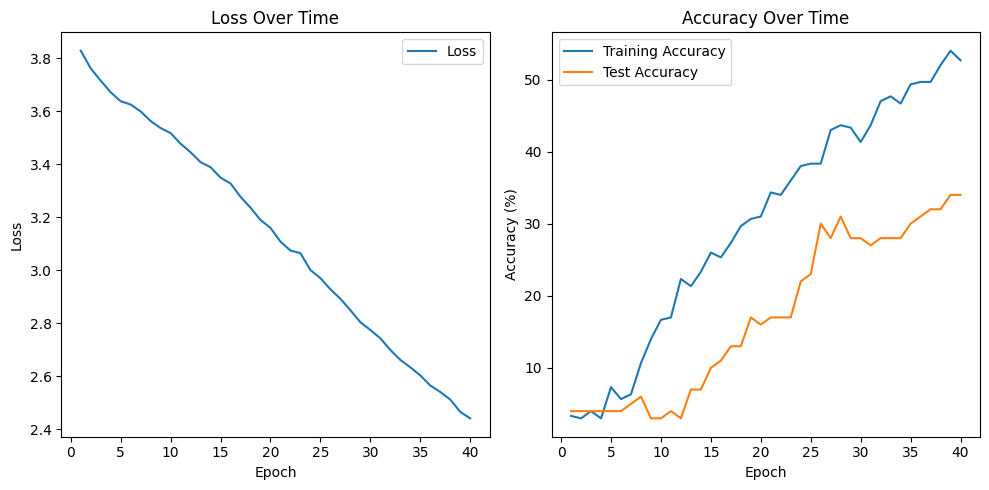

Final training accuracy for Model 5 (LeakyReLU and Stochastic Gradient Descent):  52.666666666666664
Final testing accuracy for Model 5 (LeakyReLU and Stochastic Gradient Descent):  34.0
Final loss for Model 5 (LeakyReLU and Stochastic Gradient Descent):  2.441294527053833


In [32]:
# Now you can call the training function with the necessary parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model5.parameters(), lr=0.001)
final_train_accuracy_model5, final_test_accuracy_model5, final_losses_model5 = train_model(model5, train_loader, test_loader, criterion, optimizer, num_epochs=40)
print("Final training accuracy for Model 5 (LeakyReLU and Stochastic Gradient Descent): ", final_train_accuracy_model5)
print("Final testing accuracy for Model 5 (LeakyReLU and Stochastic Gradient Descent): ", final_test_accuracy_model5)
print("Final loss for Model 5 (LeakyReLU and Stochastic Gradient Descent): ", final_losses_model5)

Model 6 is Tanh with SGD

In [33]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, activation_fn=nn.Tanh, drop_rate=0.0):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.activation_fn = activation_fn()
        self.dropout = nn.Dropout(p=drop_rate)  # Dropout layer
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.dropout(out)  # Apply dropout
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.activation_fn(out)
        return out

    
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=40, activation_fn=nn.Tanh):
        super(ResNet, self).__init__()
        self.in_planes = 64

        # Initial convolution
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.activation_fn = activation_fn()
        
        # ResNet layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, activation_fn=activation_fn,drop_rate=0.1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, activation_fn=activation_fn,drop_rate=0.1)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, activation_fn=activation_fn,drop_rate=0.1)

        self._to_linear = None
        self._get_conv_output_size(torch.rand(1, 1, 64, 64))

        self.linear = nn.Linear(self._to_linear, num_classes)
    
    def _make_layer(self, block, planes, num_blocks, stride, activation_fn, drop_rate=0.0):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, activation_fn=activation_fn, drop_rate=drop_rate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)


    def _get_conv_output_size(self, shape):
        with torch.no_grad():
            self.eval()
            output = self._forward_conv_only(shape)
            self._to_linear = np.prod(output.size()[1:])
            self.train()

    def _forward_conv_only(self, x):
        out = self.activation_fn(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        return out

    def forward(self, x):
        out = self._forward_conv_only(x)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [34]:
# Instantiate the model
num_blocks = [2, 2, 2, 2]  # ResNet18-like architecture
model6 = ResNet(BasicBlock, num_blocks, num_classes=40)

Epoch 1/40, Loss: 3.6765, Train Accuracy: 3.33%
Test Accuracy: 1.00%

Epoch 2/40, Loss: 3.6518, Train Accuracy: 6.33%
Test Accuracy: 0.00%

Epoch 3/40, Loss: 3.6432, Train Accuracy: 7.67%
Test Accuracy: 0.00%

Epoch 4/40, Loss: 3.6160, Train Accuracy: 8.33%
Test Accuracy: 6.00%

Epoch 5/40, Loss: 3.6060, Train Accuracy: 11.33%
Test Accuracy: 8.00%

Epoch 6/40, Loss: 3.5944, Train Accuracy: 11.00%
Test Accuracy: 10.00%

Epoch 7/40, Loss: 3.5649, Train Accuracy: 13.33%
Test Accuracy: 9.00%

Epoch 8/40, Loss: 3.5536, Train Accuracy: 12.00%
Test Accuracy: 9.00%

Epoch 9/40, Loss: 3.5267, Train Accuracy: 15.67%
Test Accuracy: 9.00%

Epoch 10/40, Loss: 3.5030, Train Accuracy: 14.67%
Test Accuracy: 8.00%

Epoch 11/40, Loss: 3.4843, Train Accuracy: 13.00%
Test Accuracy: 8.00%

Epoch 12/40, Loss: 3.4542, Train Accuracy: 16.33%
Test Accuracy: 9.00%

Epoch 13/40, Loss: 3.4359, Train Accuracy: 14.00%
Test Accuracy: 9.00%

Epoch 14/40, Loss: 3.3979, Train Accuracy: 15.33%
Test Accuracy: 8.00%

Epoc

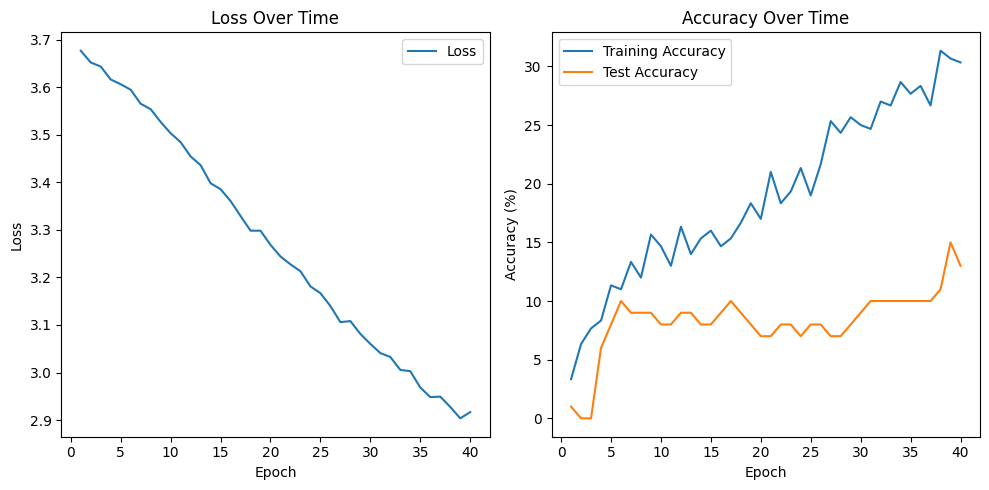

Final training accuracy for Model 6 (Tanh and Stochastic Gradient Descent):  30.333333333333332
Final testing accuracy for Model 6 (Tanh and Stochastic Gradient Descent):  13.0
Final loss for Model 6 (Tanh and Stochastic Gradient Descent):  2.916726493835449


In [35]:
# Now you can call the training function with the necessary parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model6.parameters(), lr=0.001)
final_train_accuracy_model6, final_test_accuracy_model6, final_losses_model6 = train_model(model6, train_loader, test_loader, criterion, optimizer, num_epochs=40)
print("Final training accuracy for Model 6 (Tanh and Stochastic Gradient Descent): ", final_train_accuracy_model6)
print("Final testing accuracy for Model 6 (Tanh and Stochastic Gradient Descent): ", final_test_accuracy_model6)
print("Final loss for Model 6 (Tanh and Stochastic Gradient Descent): ", final_losses_model6)

In [38]:
import pandas as pd
combinations = ['ReLU with Adam', 'Leaky ReLU with Adam', 'Tanh with Adam', 
                'ReLU with SGD', 'Leaky ReLU with SGD', 'Tanh with SGD']

final_loss = [final_losses_model1, final_losses_model2, final_losses_model3, 
              final_losses_model4, final_losses_model5, final_losses_model6]

final_train_accuracy = [final_train_accuracy_model1, final_train_accuracy_model2, final_train_accuracy_model3,
                        final_train_accuracy_model4, final_train_accuracy_model5, final_train_accuracy_model6]

final_test_accuracy = [final_test_accuracy_model1, final_test_accuracy_model2, final_test_accuracy_model3, 
                       final_test_accuracy_model4, final_test_accuracy_model5, final_test_accuracy_model6]

data = {
    'Combination': combinations,
    'Final Loss': final_loss,
    'Final Train Accuracy': final_train_accuracy,
    'Final Test Accuracy': final_test_accuracy
}

df = pd.DataFrame(data)
df

,Combination,Final Loss,Final Train Accuracy,Final Test Accuracy
0,ReLU with Adam,0.001001,100.000000,96.0
1,Leaky ReLU with Adam,0.001095,100.000000,97.0
2,Tanh with Adam,0.005366,100.000000,82.0
3,ReLU with SGD,2.542081,42.666667,21.0
4,Leaky ReLU with SGD,2.441295,52.666667,34.0
5,Tanh with SGD,2.916726,30.333333,13.0
